# Opinion Dynamics

## Import libraries

In [ ]:
%matplotlib inline

import ndlib
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
import pandas as pd 
import matplotlib.pyplot as plt
#import matplotlib

from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op

## Edgelist import

In [2]:
#df = pd.read_csv("edgelist_extended.csv", skipinitialspace=True, na_values='?', keep_default_na=True)

In [3]:
g = nx.read_gexf("../../data_collection/data/RW_Graphs/SCC_weighted_graph.gexf")

In [4]:
g.remove_edges_from(nx.selfloop_edges(g))

In [5]:
#Number of nodes in the original graph
len(g.nodes())

46978

In [6]:
ws = nx.watts_strogatz_graph(46978, k=4, p=0.8, seed = 42) 
ba = nx.barabasi_albert_graph(46978, 2, seed = 42) 
#er = nx.erdos_renyi_graph(47650, 0.0001116/2, directed = True, seed = 42) 

## Voter model
The state of the population varies based on a very simple update rule: at each iteration, a random individual is selected, who then copies the opinion of one random neighbour.

### RW Network

In [8]:
# Su componente unica

In [7]:
#fraction 0.5
model = op.VoterModel(g, seed = 2)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()
#plt.show()

plt.savefig("plots/Voter_0.5.png")

C:\Users\Martina\anaconda3\lib\site-packages\ndlib\viz\mpl\DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [8]:
# #fraction 0.7
# model = op.VoterModel(g, seed = 2)
# config = mc.Configuration()
# config.add_model_parameter('fraction_infected', 0.7)
# model.set_initial_status(config)

# iterations = model.iteration_bunch(2000)
# trends = model.build_trends(iterations)

# viz = DiffusionTrend(model, trends)
# viz.plot()
# plt.show()
# plt.savefig("plots/OD/Voter_0.7.png")

C:\Users\Martina\anaconda3\lib\site-packages\ndlib\viz\mpl\DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\Martina\AppData\Local\Temp/ipykernel_3128/1518371483.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


### BA Network

In [9]:
#fraction 0.5
model = op.VoterModel(ba, seed = 2)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)


iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
plt.show()
viz.plot()
plt.savefig("plots/OD/VoterBA_0.5.png")

C:\Users\Martina\AppData\Local\Temp/ipykernel_3128/1071173891.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\Martina\anaconda3\lib\site-packages\ndlib\viz\mpl\DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [12]:
# #fraction 0.7
# model = op.VoterModel(ba, seed = 2)
# config = mc.Configuration()
# config.add_model_parameter('fraction_infected', 0.7)
# model.set_initial_status(config)


# iterations = model.iteration_bunch(2000)
# trends = model.build_trends(iterations)

# viz = DiffusionTrend(model, trends)
# viz.plot()
# plt.show()
# plt.savefig("plots/OD/VoterBA_0.7.png")

C:\Users\Martina\anaconda3\lib\site-packages\ndlib\viz\mpl\DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\Martina\AppData\Local\Temp/ipykernel_14584/588140776.py:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


### WS Network

In [10]:
model = op.VoterModel(ws, seed = 2)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)


iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()
plt.show()
plt.savefig("plots/OD/VoterWS_0.5.png")

C:\Users\Martina\anaconda3\lib\site-packages\ndlib\viz\mpl\DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\Martina\AppData\Local\Temp/ipykernel_3128/2749551031.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [14]:
# #fraction 0.7
# model = op.VoterModel(ws, seed = 2)
# config = mc.Configuration()
# config.add_model_parameter('fraction_infected', 0.7)
# model.set_initial_status(config)


# iterations = model.iteration_bunch(2000)
# trends = model.build_trends(iterations)

# viz = DiffusionTrend(model, trends)
# viz.plot()
# plt.show()

# plt.savefig("plots/OD/VoterWS_0.7.png")

C:\Users\Martina\anaconda3\lib\site-packages\ndlib\viz\mpl\DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\Martina\AppData\Local\Temp/ipykernel_14584/2677780522.py:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


## Majority Rule

Agents take discrete opinions ±1, just like the Voter model. At each time step a group of r agents is selected randomly and they all take the majority opinion within the group.

### RW Network

In [11]:
#fraction 0.5
model = op.MajorityRuleModel(g)
config = mc.Configuration()
config.add_model_parameter('q', 5)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()
plt.savefig("plots/OD/MajorityRule_0.5.png")

C:\Users\Martina\anaconda3\lib\site-packages\ndlib\viz\mpl\DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [16]:
# #fraction 0.7
# model = op.MajorityRuleModel(g)
# config = mc.Configuration()
# config.add_model_parameter('q', 5)
# config.add_model_parameter('fraction_infected', 0.7)

# model.set_initial_status(config)

# # Simulation execution
# iterations = model.iteration_bunch(2000)
# trends = model.build_trends(iterations)

# viz = DiffusionTrend(model, trends)
# viz.plot()
# plt.savefig("plots/OD/MajorityRule_0.7.png")

C:\Users\Martina\anaconda3\lib\site-packages\ndlib\viz\mpl\DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


### BA Network

In [12]:
#fraction 0.5
model = op.MajorityRuleModel(ba)
config = mc.Configuration()
config.add_model_parameter('q', 5)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()
plt.savefig("plots/OD/MajorityRuleBA_0.5.png")

C:\Users\Martina\anaconda3\lib\site-packages\ndlib\viz\mpl\DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [18]:
# #fraction 0.7
# model = op.MajorityRuleModel(ba)
# config = mc.Configuration()
# config.add_model_parameter('q', 5)
# config.add_model_parameter('fraction_infected', 0.7)

# model.set_initial_status(config)

# # Simulation execution
# iterations = model.iteration_bunch(2000)
# trends = model.build_trends(iterations)

# viz = DiffusionTrend(model, trends)
# viz.plot()
# plt.savefig("plots/OD/MajorityRuleBA_0.7.png")

C:\Users\Martina\anaconda3\lib\site-packages\ndlib\viz\mpl\DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


### WS Network

In [13]:
#fraction 0.5
model = op.MajorityRuleModel(ws)
config = mc.Configuration()
config.add_model_parameter('q', 5)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()
plt.savefig("plots/OD/MajorityRuleWS_0.5.png")

C:\Users\Martina\anaconda3\lib\site-packages\ndlib\viz\mpl\DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [20]:
# #fraction 0.7
# model = op.MajorityRuleModel(ws)
# config = mc.Configuration()
# config.add_model_parameter('q', 5)
# config.add_model_parameter('fraction_infected', 0.7)

# model.set_initial_status(config)

# # Simulation execution
# iterations = model.iteration_bunch(2000)
# trends = model.build_trends(iterations)

# viz = DiffusionTrend(model, trends)
# viz.plot()
# plt.savefig("plots/OD/MajorityRuleWS_0.7.png")

C:\Users\Martina\anaconda3\lib\site-packages\ndlib\viz\mpl\DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


## Sznajd
Each agent has an opinion σi = ±1. At each time step, a pair of neighbouring agents is selected and, if their opinion coincides, all their neighbours take that opinion.

### RW Network

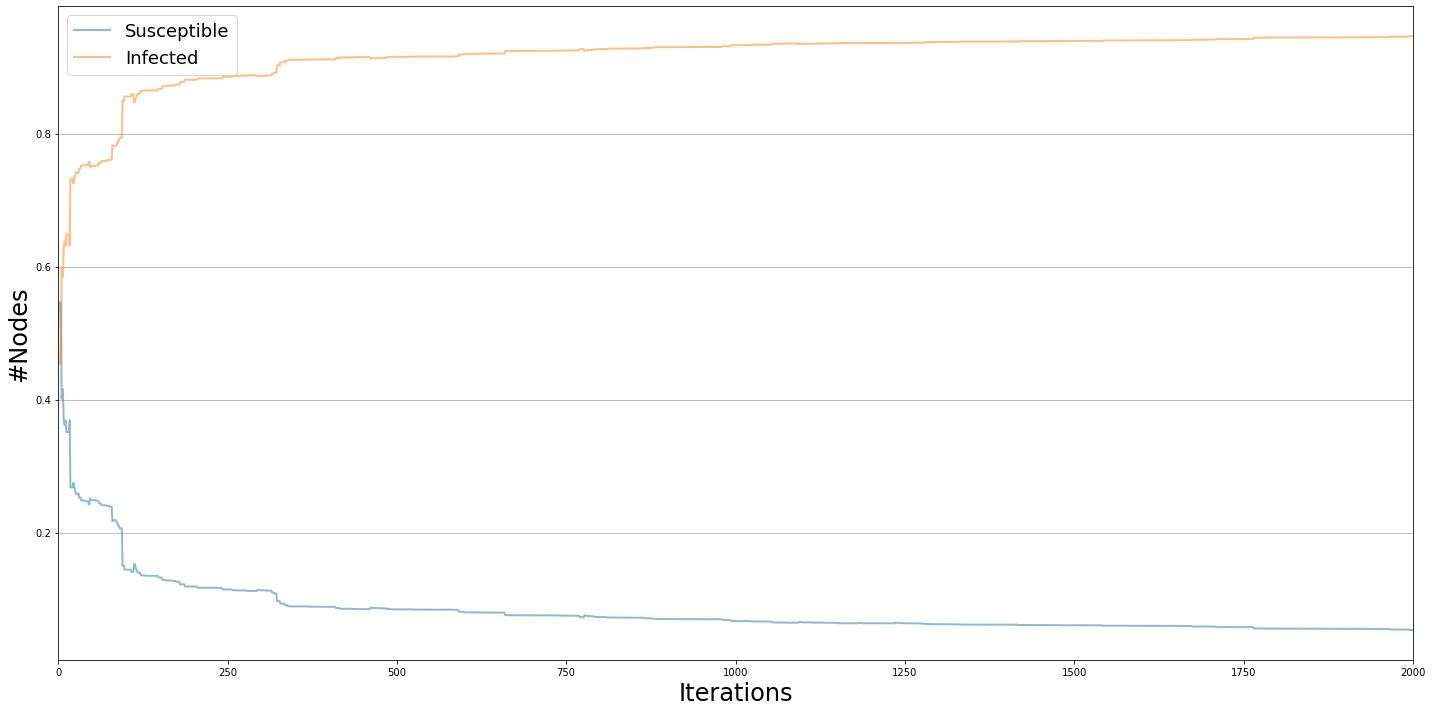

<Figure size 432x288 with 0 Axes>

In [14]:
#fraction 0.5
model = op.SznajdModel(g)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)

%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()
plt.savefig("plots/OD/Sznajd_0.5.png")

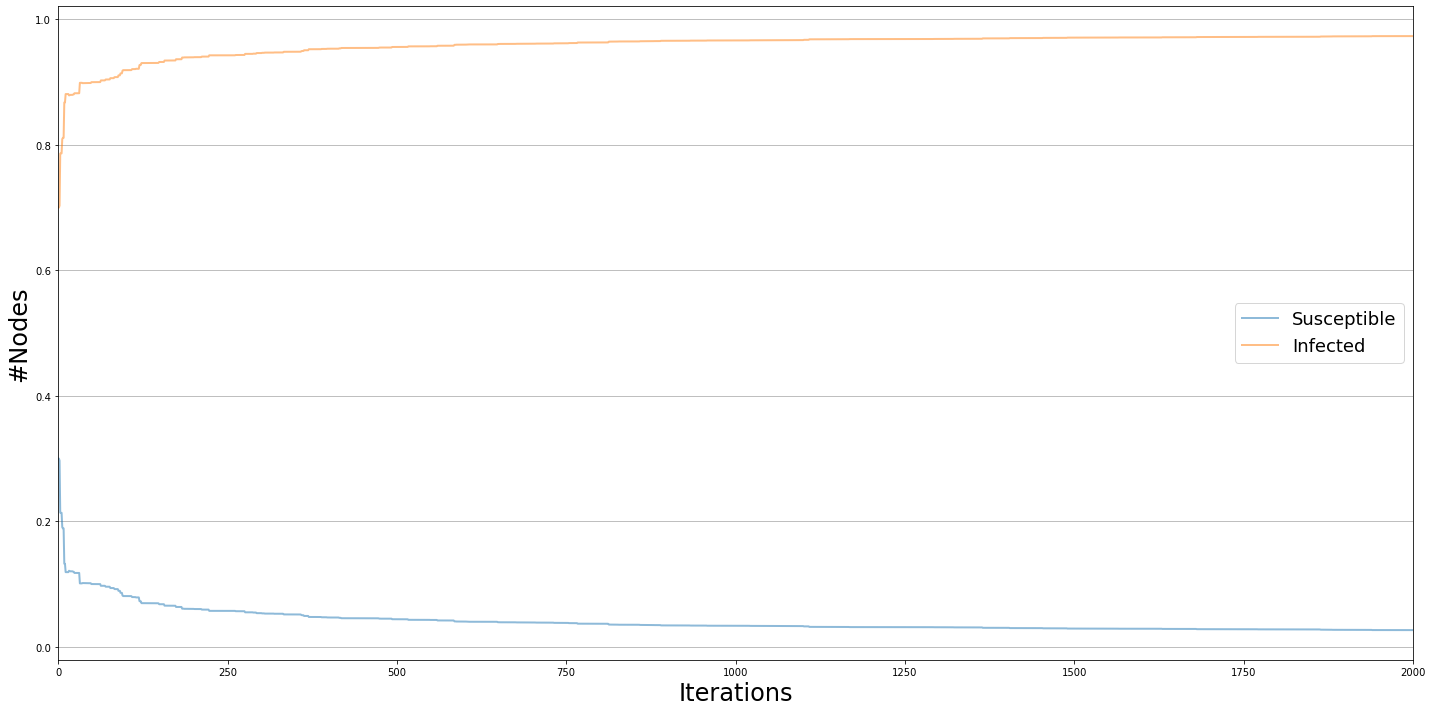

<Figure size 432x288 with 0 Axes>

In [22]:
# #fraction 0.7
# model = op.SznajdModel(g)
# config = mc.Configuration()
# config.add_model_parameter('fraction_infected', 0.7)

# model.set_initial_status(config)

# # Simulation execution
# iterations = model.iteration_bunch(2000)
# trends = model.build_trends(iterations)

# %matplotlib inline
# from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
# viz = DiffusionTrend(model, trends)
# viz.plot()
# plt.savefig("plots/OD/Sznajd_0.7.png")

### BA Network

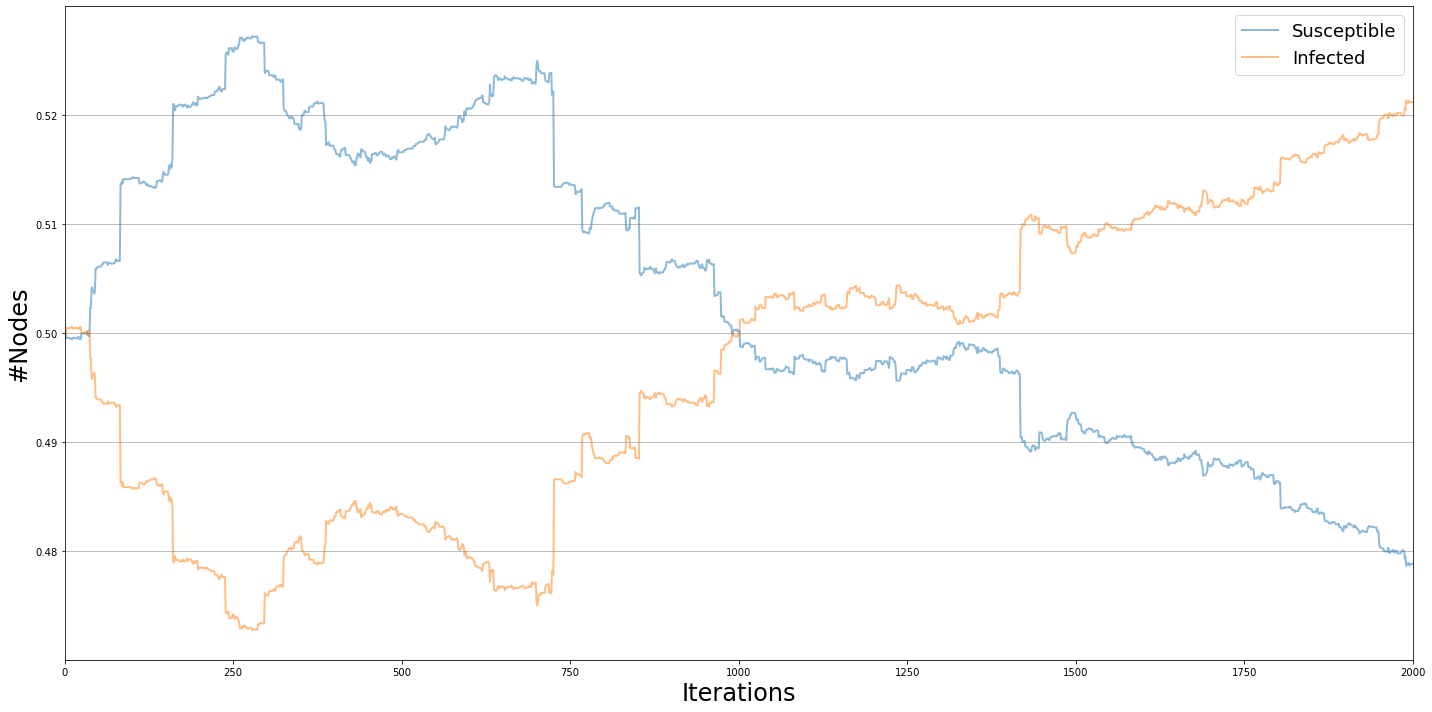

<Figure size 432x288 with 0 Axes>

In [15]:
#fraction 0.5
model = op.SznajdModel(ba)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()
plt.savefig("plots/OD/SznajdBA_0.5.png")

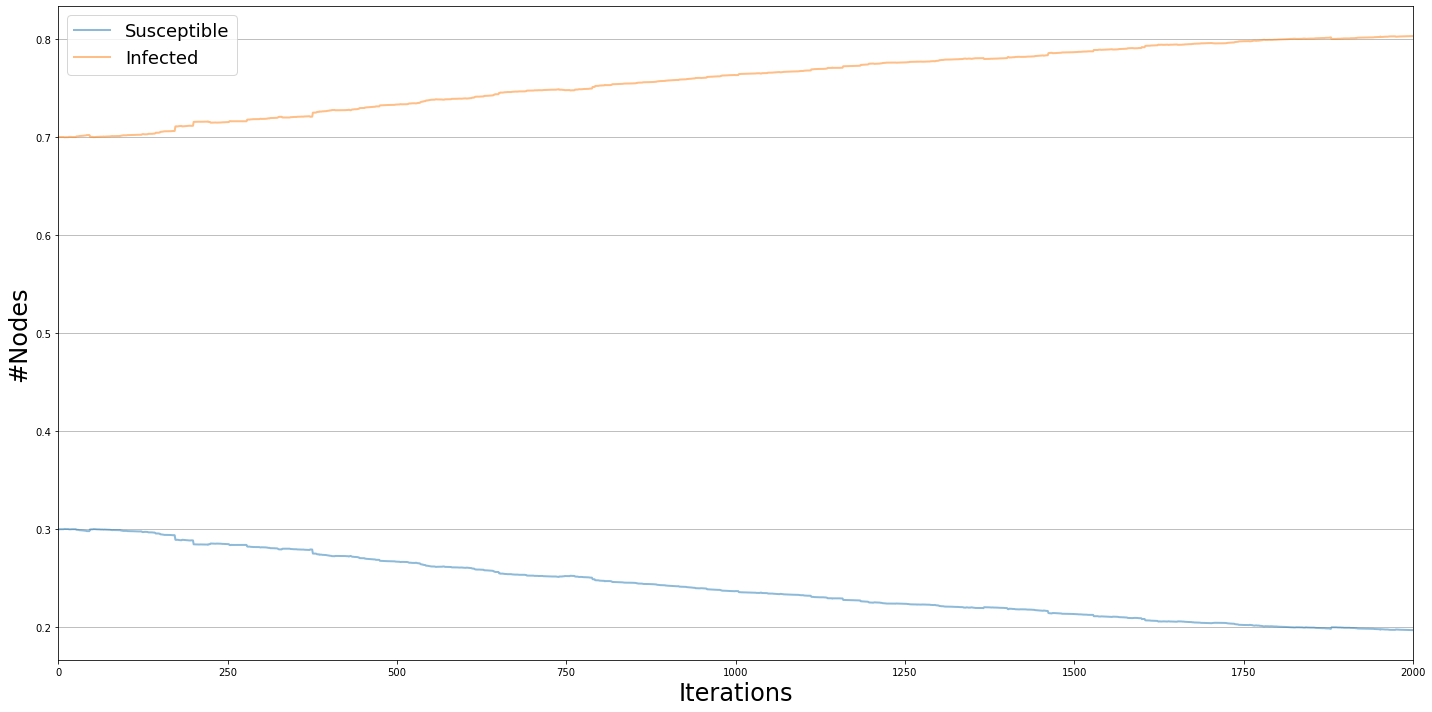

<Figure size 432x288 with 0 Axes>

In [24]:
# #fraction 0.7
# model = op.SznajdModel(ba)
# config = mc.Configuration()
# config.add_model_parameter('fraction_infected', 0.7)

# model.set_initial_status(config)

# # Simulation execution
# iterations = model.iteration_bunch(2000)
# trends = model.build_trends(iterations)

# viz = DiffusionTrend(model, trends)
# viz.plot()
# plt.savefig("plots/OD/SznajdBA_0.7.png")

### WS Network

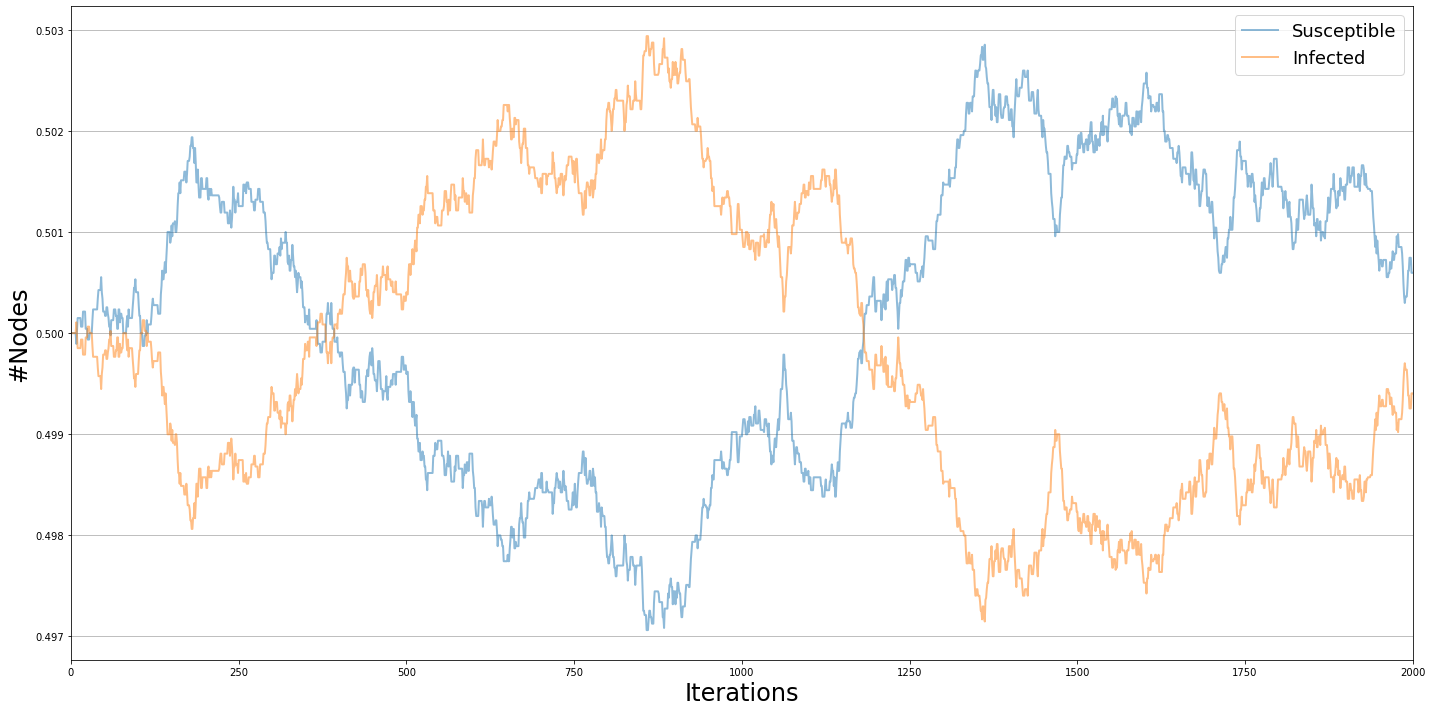

<Figure size 432x288 with 0 Axes>

In [16]:
#fraction 0.5
model = op.SznajdModel(ws)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()
plt.savefig("plots/OD/SznajdWS_0.5.png")

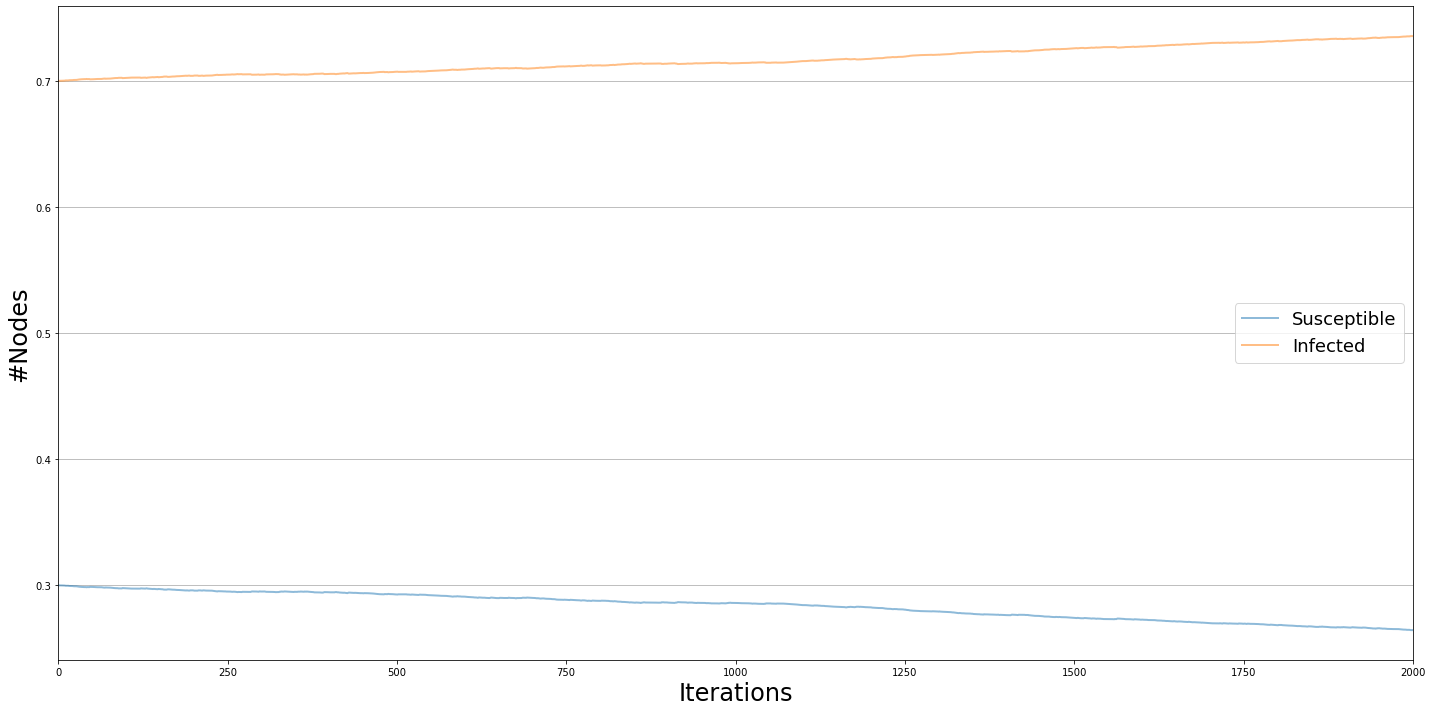

<Figure size 432x288 with 0 Axes>

In [26]:
# #fraction 0.7
# model = op.SznajdModel(ws)
# config = mc.Configuration()
# config.add_model_parameter('fraction_infected', 0.7)

# model.set_initial_status(config)

# # Simulation execution
# iterations = model.iteration_bunch(2000)
# trends = model.build_trends(iterations)

# viz = DiffusionTrend(model, trends)
# viz.plot()
# plt.savefig("plots/OD/SznajdWS_0.7.png")